| Variable | Definition                                 | Key                                                                                                                                                                                                |
|----------|--------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                                                                                                                                                                    |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd  pclass : A proxy for socio-economic status (SES)  1st = Upper  2nd = Middle  3rd = Lower                                                                                |
| sex      | Sex                                        |                                                                                                                                                                                                    |
| Age      | Age in years                               | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                                                                               |
| sibsp    | # of siblings / spouses aboard the Titanic | The dataset defines family relations in this way...  Sibling = brother, sister, stepbrother, stepsister  Spouse = husband, wife (mistresses and fiancés were ignored)                              |
| parch    | # of parents / children aboard the Titanic | The dataset defines family relations in this way...  Parent = mother, father  Child = daughter, son, stepdaughter, stepson  Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Ticket number                              |                                                                                                                                                                                                    |
| fare     | Passenger fare                             |                                                                                                                                                                                                    |
| cabin    | Cabin number                               |                                                                                                                                                                                                    |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton                                                                                                                                                     |

In [55]:
import pandas as pd
import numpy as np
import missingno as msno

In [82]:
df_test = pd.read_csv('./data/test.csv')
df_train = pd.read_csv('./data/train.csv')

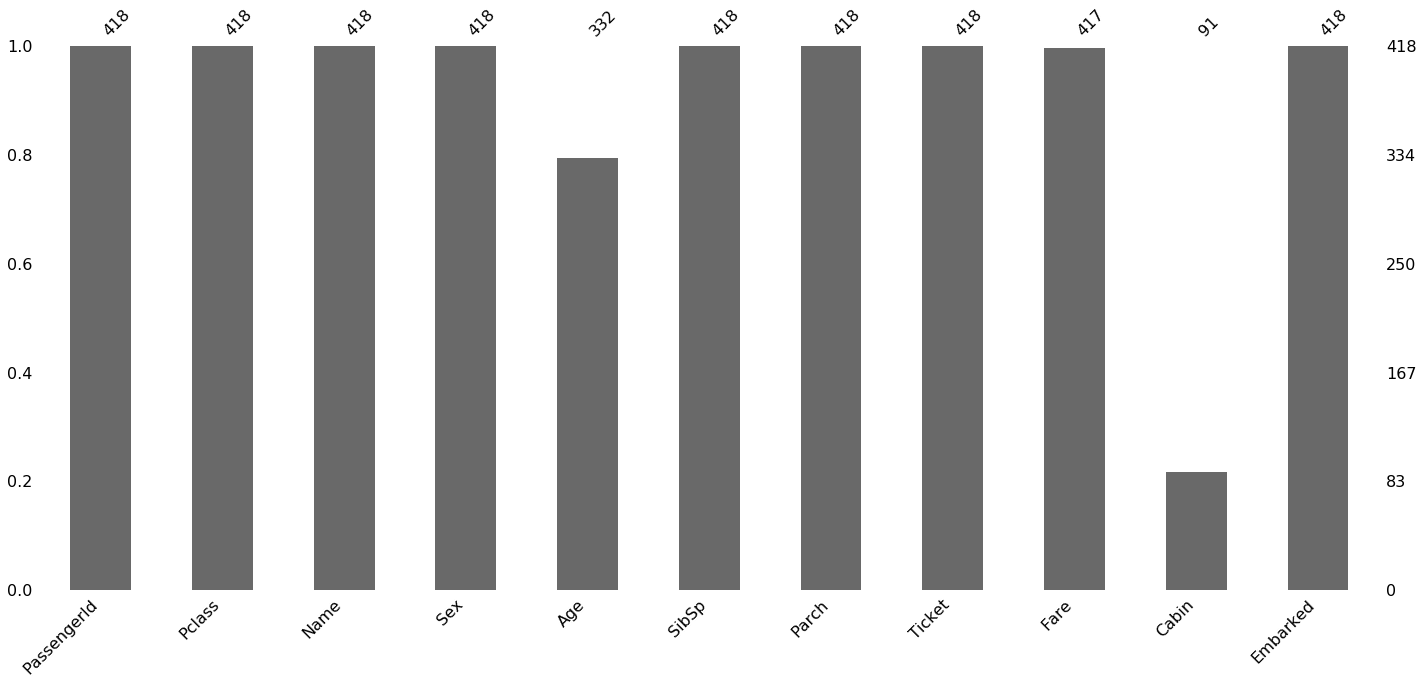

In [83]:
msno.bar(df_test)

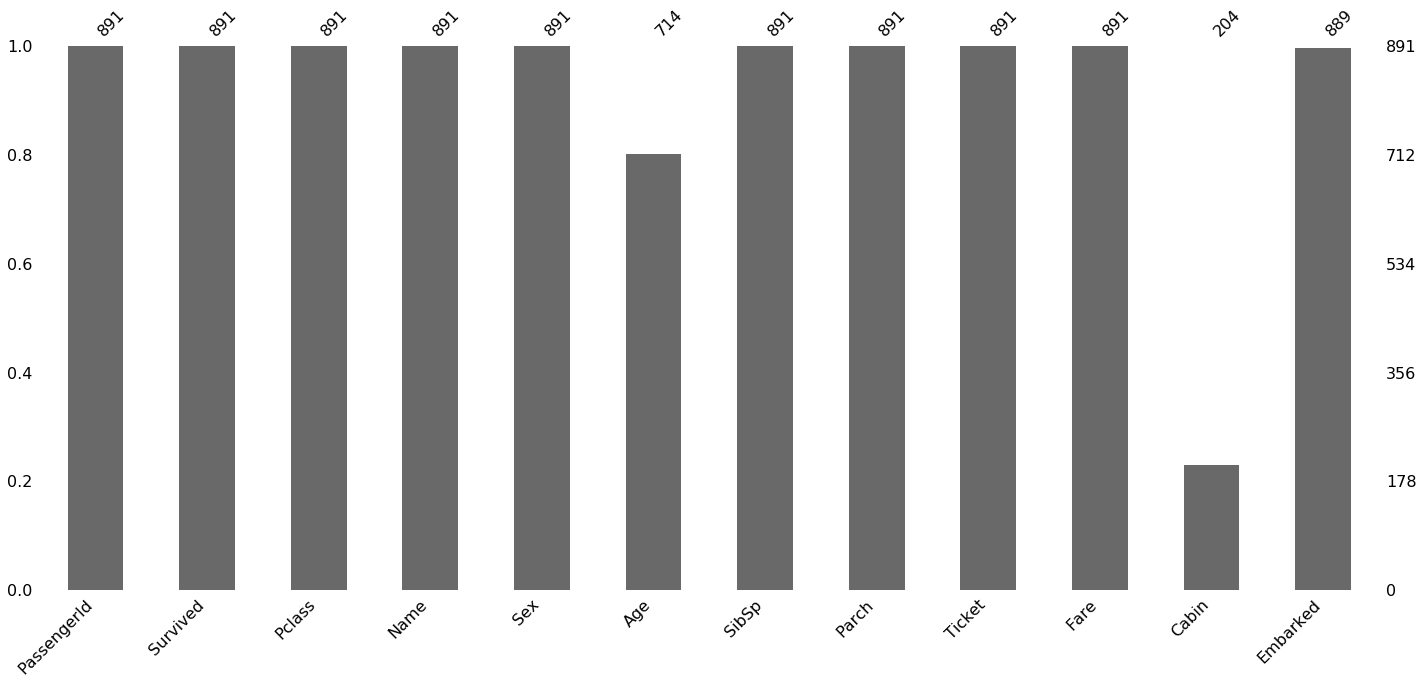

In [84]:
msno.bar(df_train)

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
title          418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


I want to extract the titles of the passangers on the ship. To do this I created a simple regex function that got all the values between ', and '.' This should have created a column that contains all the titles from the name catagory.

In [87]:
import re
str_srch = r',\s(.*?)\.' #get all values between ', ' and '.' 

In [88]:
df_train['title'] = [re.findall(str_srch,i) for i in df_train.Name.values]

In [89]:
df_train.title = [df_train.title.values[i][0] for i in range(df_train.shape[0])] 

In [90]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [91]:
#df_train.title.values #got 'em all

In [92]:
df_test['title'] = [re.findall(str_srch,i) for i in df_test.Name.values]
df_test.title = [df_test.title.values[i][0] for i in range(df_test.shape[0])] 

In [93]:
#df_test.title.values #here too

In the test data there is one value missing from the 'Fair' column. This represents 0.23% of the data. Similarly, the 'Embarked'

In [100]:
df_test.dropna(subset=['Fare'],inplace=True)
df_train.dropna(subset=['Embarked'],inplace=True)

The problem with the Cabin column is the opposite. Only 19% of the data is valid in the test dataframe and 23% is valid in the train dataframe. The solution here is to drop the entire column.

In [95]:
df_test.drop('Cabin', axis=1, inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)

The age column is the most interesting. The test data and train sets both have about 80% of the data intact. This is enough to attempt to make valid guesses with the data to attempt to fill in the missing values. 

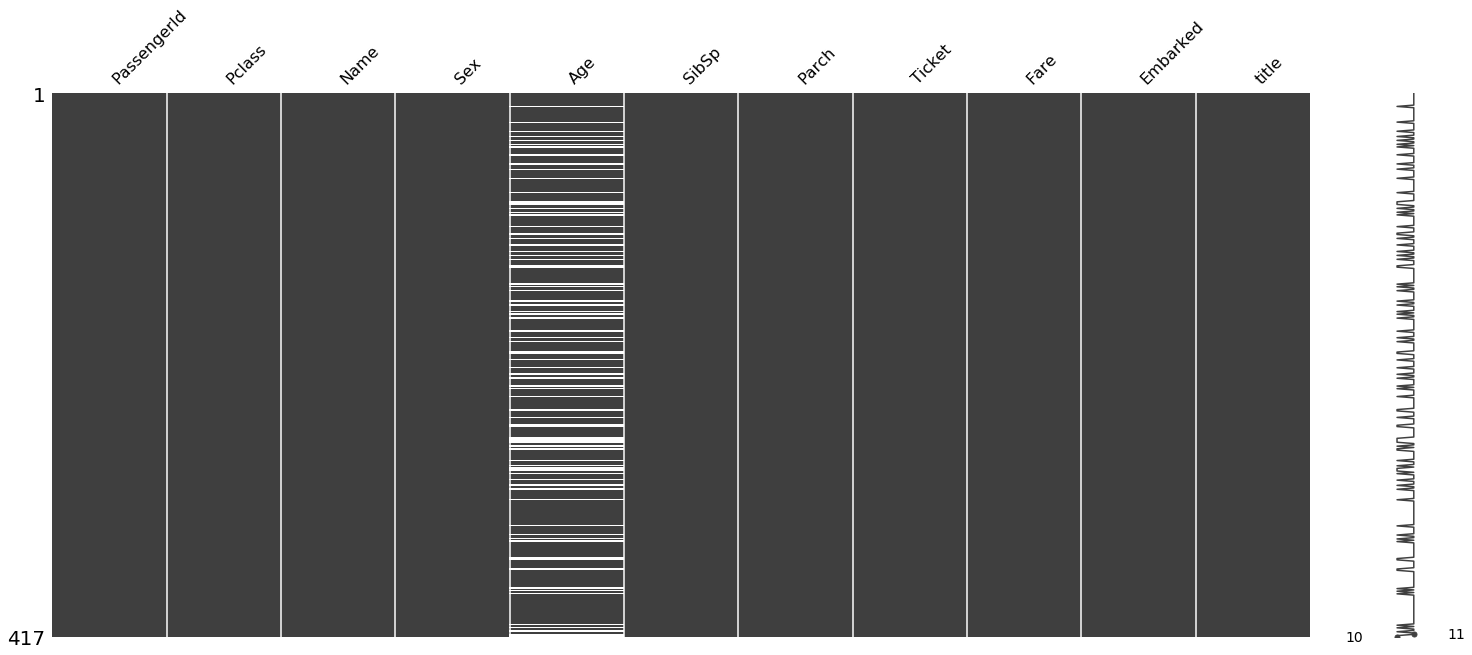

In [101]:
msno.matrix(df_test);

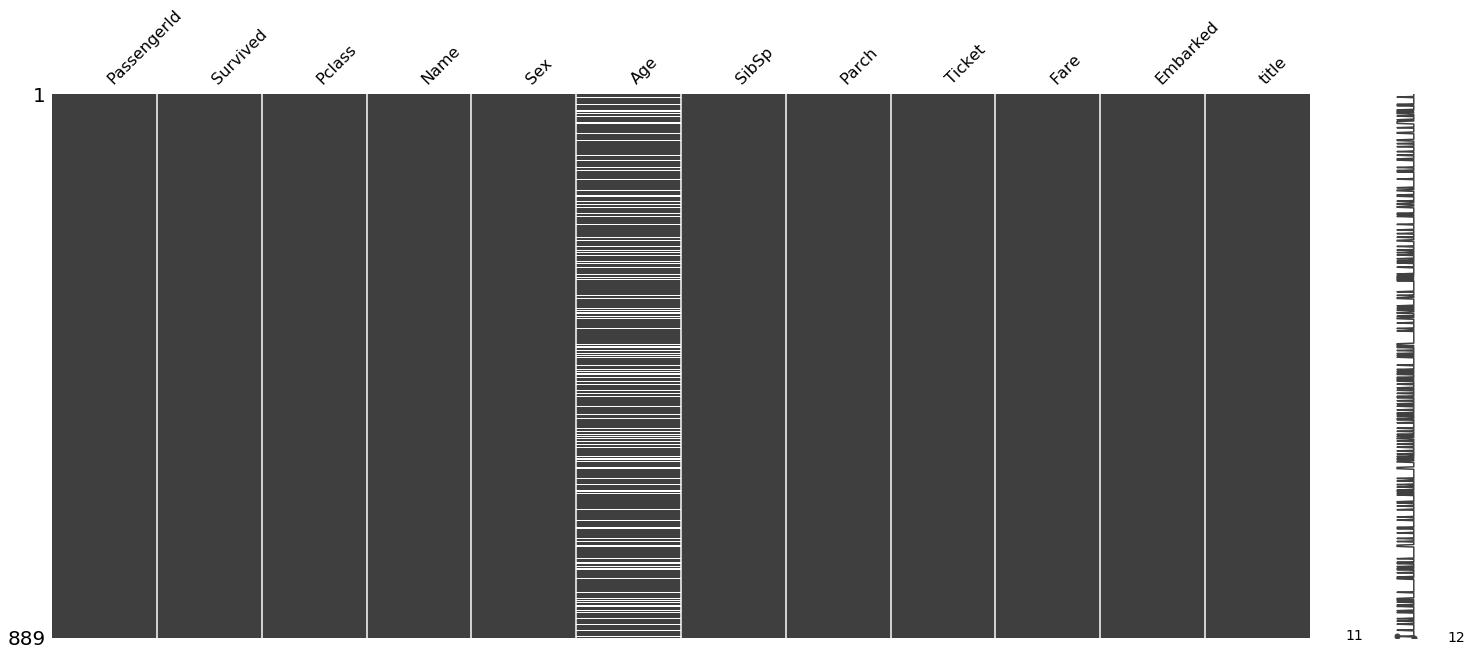

In [102]:
msno.matrix(df_train);

Looking at the mean values in both the test and train sets we see that the age values are almost identical coming in at about 30 years.

In [70]:
print(df_test.Age.mean())
print(df_train.Age.mean())

30.272590361445783
29.69911764705882


This does not appear when we seperate the data based on the passanger class. In both the test and train sets the mean age is abou 25 for trird class, 29 for second class and about 40 for third class.

In [68]:
print(df_test[df_test.Pclass==3].Age.mean())
print(df_test[df_test.Pclass==2].Age.mean())
print(df_test[df_test.Pclass==1].Age.mean())

24.02794520547945
28.7775
40.91836734693877


In [71]:
print(df_train[df_train.Pclass==3].Age.mean())
print(df_train[df_train.Pclass==2].Age.mean())
print(df_train[df_train.Pclass==1].Age.mean())

25.14061971830986
29.87763005780347
38.233440860215055


Looking at the mean age based on title we see that the test and train sets also show a strng corrilation with people with the title of Master averageing under 10, people with the title of Miss appearing at about 21, people with the title of Ms and Mr appearing at about 32 and 37 respectively. 

In [75]:
print(df_test[df_test.title=='Master'].Age.mean())
print(df_test[df_test.title=='Mr'].Age.mean())
print(df_test[df_test.title=='Mrs'].Age.mean())
print(df_test[df_test.title=='Miss'].Age.mean())

7.406470588235294
32.0
38.903225806451616
21.774843750000002


In [76]:
print(df_train[df_train.title=='Master'].Age.mean())
print(df_train[df_train.title=='Mr'].Age.mean())
print(df_train[df_train.title=='Mrs'].Age.mean())
print(df_train[df_train.title=='Miss'].Age.mean())

4.574166666666667
32.368090452261306
35.898148148148145
21.773972602739725


In [107]:
print(df_test[df_test.Embarked=='Q'].Age.mean())
print(df_test[df_test.Embarked=='C'].Age.mean())
print(df_test[df_test.Embarked=='S'].Age.mean())

29.318181818181817
34.73780487804878
28.61894273127753


In [111]:
print(df_test[df_test.Sex=='male'].Age.mean())
print(df_test[df_test.Sex=='female'].Age.isnan().count())

30.124558823529412


AttributeError: 'Series' object has no attribute 'isnan'